In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Create Sinewave

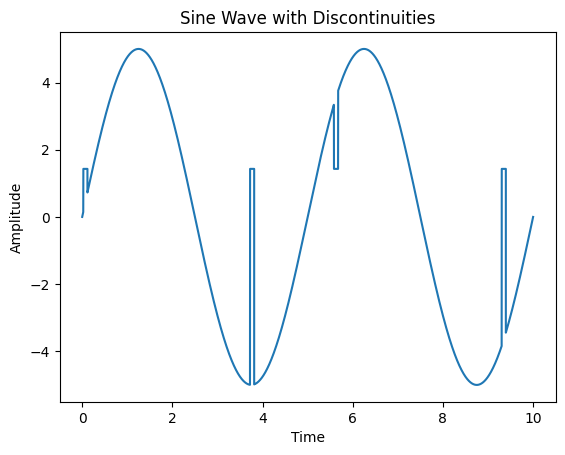

In [11]:
# Define the time range
t = np.linspace(0, 10, 430000)

# Define the frequency and amplitude of the sine wave
frequency = 0.2  # Adjust the frequency as needed
amplitude = 5  # Adjust the amplitude as needed

# Create the sine wave with discontinuities
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)

# Introduce discontinuities at specific indices
discontinuity_indices = [1000, 160000,240000, 400000]  # Adjust the indices as needed
discontinuity_length = 4000  # Adjust the length as needed

for index in discontinuity_indices:
    sine_wave[index:index+discontinuity_length] = +1.43

# Plot the sine wave

plt.plot(t, sine_wave)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine Wave with Discontinuities')
plt.show()

sine_wave_series = pd.Series(sine_wave)
sine_wave_series.to_csv(f'/Users/tristan/Library/CloudStorage/OneDrive-StellenboschUniversity/Academics/Final_year/Semester 2/Skripsie/Data/Sine Wave/data.csv')


In [ ]:
# Convert the numpy array to a pandas Series
sine_wave_series = pd.Series(sine_wave)
window_size = 30

# Smooth the data only in the areas with discontinuities
for index in discontinuity_indices:
    start_index = index
    end_index = index + discontinuity_length
    sine_wave_series[start_index:end_index] = sine_wave_series[start_index:end_index].rolling(window=window_size).mean()

# Plot the sine wave
plt.plot(t, sine_wave_series)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine Wave with Discontinuities (Smoothed)')
plt.show()
